In [40]:
#Import Necessary Packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import seaborn as sns

In [41]:
#Load data
Insurance = pd.read_csv('insurance.csv')

In [42]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
Insurance.shape

(1338, 7)

In [14]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
Insurance.drop(['region'],axis=1,inplace=True)

# co-realtion

<AxesSubplot:>

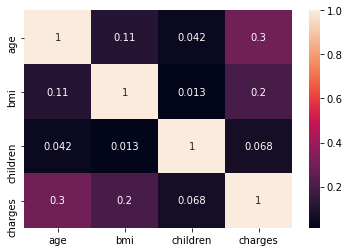

In [10]:
data_new=data.corr()
sns.heatmap(data_new,annot=True)

C:\Users\pramodh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


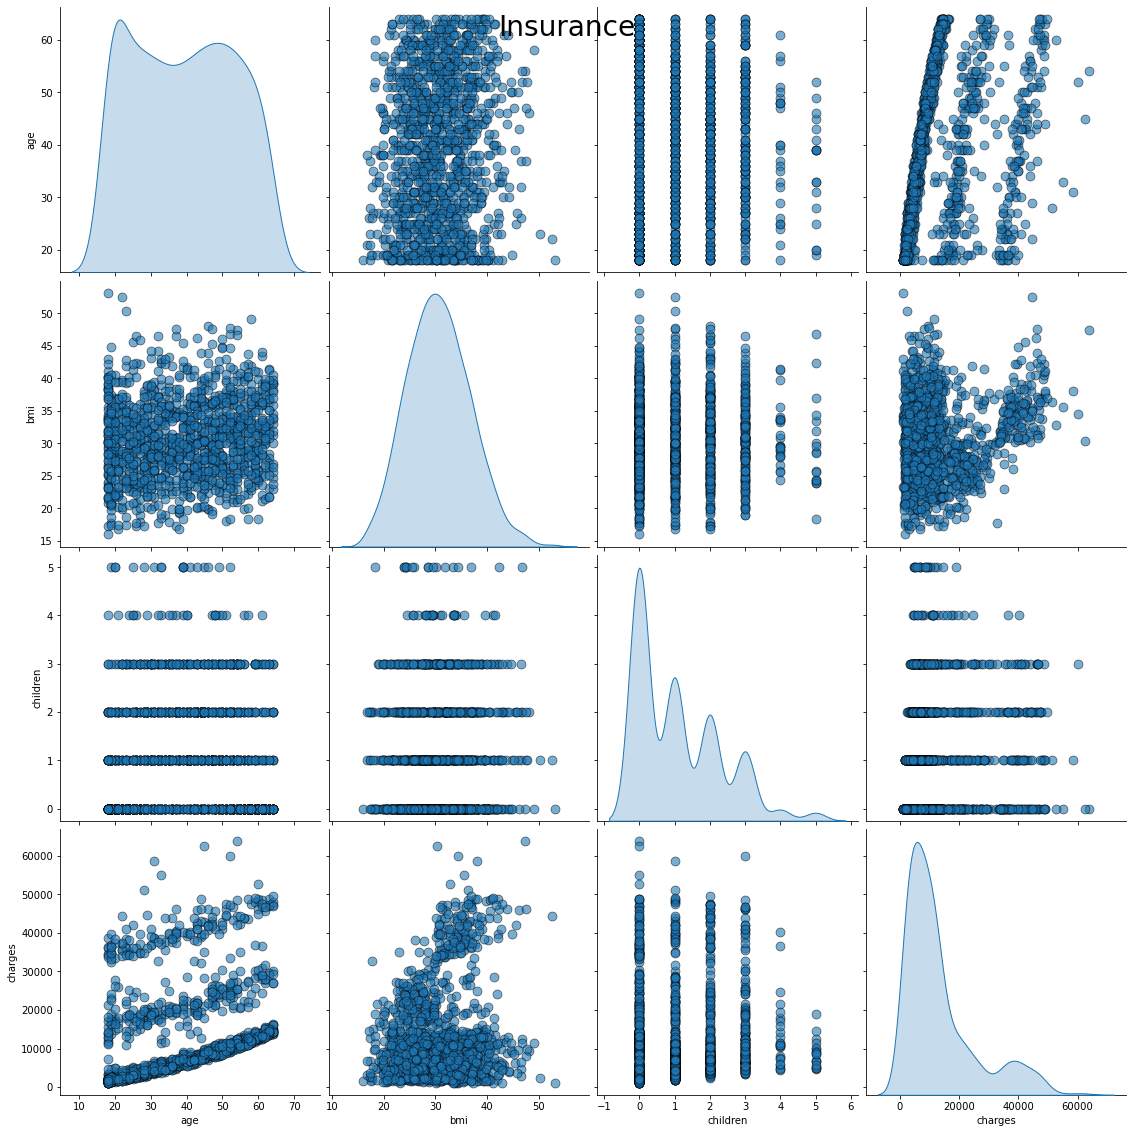

In [11]:
#Visualization of Dataset
sns.pairplot(data, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.suptitle('Insurance', 
             size = 28);

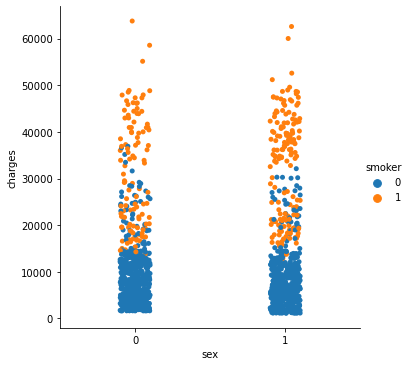

In [34]:
sns.catplot(x = 'sex',y = 'charges',data=Insurance , hue = 'smoker')

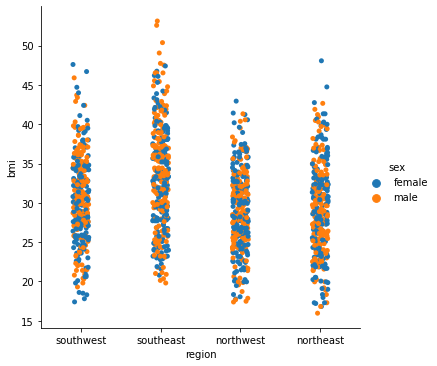

In [45]:
sns.catplot(x = 'region' , y = 'bmi', data = Insurance ,  hue = 'sex')

In [19]:
#Encoding
Insurance.loc[:,['sex','smoker']]= Insurance.loc[:,['sex','smoker']].apply(LabelEncoder().fit_transform)

# Linear Regeression

In [20]:
X = Insurance.iloc[:,:-1]
y = Insurance['charges']
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [22]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
r2=r2_score(y_test,y_predict)#checking r2_score
r2

0.7040911996613199

In [23]:
len(X_train.columns)

5

In [26]:
n = Insurance.shape[0]
p = len(X_train.columns)

In [27]:
adj = 1-(1-r2)*(n-1)/(n-p-1)
adj

0.7029804308912799

# RandomForest

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,adjusted_rand_score,mean_absolute_error,mean_squared_error
from collections import Counter
from sklearn.preprocessing import LabelEncoder


In [30]:
X = Insurance.iloc[:,:-1]
y = Insurance['charges']
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=775)
model = RandomForestRegressor(criterion='mae', n_estimators=75,max_depth=4,min_samples_split=4)
model.fit(X_train,y_train)
y_predict =model.predict(X_test)
r2 = r2_score(y_test,y_predict)
r2


0.9022525427623206

In [32]:
adj = 1-(1-r2)*(n-1)/(n-p-1)
adj

0.9018856228777947